In [28]:
from mysql_wrapper import MysqlWrapper
login = {'host': '127.0.0.1',
        'user': 'root',
        'db': 'yummly_database'}
db = MysqlWrapper(login)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import inflect

Histogram of Ingredients

In [126]:
sql = """
SELECT ingredient_id, COUNT(recipe_id) as frequency
FROM recipe_ingredients
GROUP BY ingredient_id
ORDER BY frequency DESC
"""
result = db.read_query(sql, "")

ingredient_id = np.array([x[0] for x in result])
frequency = np.array([float(x[1]) for x in result])
print ingredient_id
print frequency

%matplotlib notebook
# plt.plot(np.arange(len(frequency)), frequency/sum(frequency))
plt.plot(np.arange(len(frequency)), np.cumsum(frequency)/sum(frequency))

[  16   13  141 ..., 3390 3406 3438]
[  3.32200000e+03   1.39300000e+03   1.26200000e+03 ...,   1.00000000e+00
   1.00000000e+00   1.00000000e+00]


Histogram of Tags

In [37]:
sql = """
SELECT tag, COUNT(recipe_id) as frequency
FROM recipe_tags
GROUP BY tag
ORDER BY frequency DESC
"""
result = db.read_query(sql, "")

print result

(('Main Dishes', 4032L), ('Baking', 2594L), ('Desserts', 2477L), ('Browning', 1880L), ('Boiling', 1239L), ('Kid-Friendly', 911L), ('Appetizers', 659L), ('Breads', 615L), ('Breakfast and Brunch', 614L), ('Side Dishes', 596L), ('Lunch and Snacks', 520L), ('Italian', 498L), ('Mexican', 484L), ('Beverages', 477L), ('Sauteeing', 454L), ('Salads', 446L), ('Soups', 431L), ('Blending', 397L), ('Afternoon Tea', 373L), ('Slow Cooking', 347L), ('American', 324L), ('Grilling', 316L), ('Christmas', 304L), ('Thanksgiving', 276L), ('Frying', 260L), ('Microwaving', 257L), ('Asian', 234L), ('Barbecue', 230L), ('Summer', 217L), ('Fall', 214L), ('Broiling', 212L), ('Southwestern', 196L), ('Frosting', 171L), ('Glazing', 170L), ('Roasting', 144L), ('Marinating', 133L), ('New Year', 112L), ('Halloween', 106L), ('Drying', 104L), ('Sunday Lunch', 94L), ('Game Day', 88L), ('Condiments and Sauces', 88L), ('Winter', 82L), ('Spring', 76L), ('Southern & Soul Food', 75L), ('French', 65L), ('Indian', 55L), ('Cocktai

Feature Vector

In [146]:
sql = """
SELECT ingredient_id, unit
FROM recipe_ingredients
GROUP BY ingredient_id, unit
"""
result = db.read_query(sql, "")

# print result
print len(result)

9254


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
raw_review = review.lower()
tokens = tokenizer.tokenize(raw_review)

In [240]:
sql = """
SELECT DISTINCT unit
FROM recipe_ingredients
ORDER BY unit
"""
result = db.read_query(sql, "")
print result

p = inflect.engine()
for x in result:
    if x[0] is not None:
        # print [x[0], p.singular_noun(x[0])]
        print [x[0], (tokenizer.tokenize(x[0]))]
     

((None,), ("'",), ('bag',), ('bags',), ('bars',), ('batch',), ('batches',), ('block',), ('blocks',), ('bowl',), ('bowls',), ('box',), ('boxes',), ('btl',), ('btls',), ('bulb',), ('bulbs',), ('bunch',), ('bunches',), ('can',), ('cans',), ('chunks',), ('clove',), ('cloves',), ('container',), ('containers',), ('cube',), ('cubes',), ('cup',), ('cups',), ('dash',), ('dashes',), ('dl',), ('drop',), ('drops',), ('ears',), ('env',), ('envs',), ('fillets',), ('floz',), ('g',), ('gal',), ('gallons',), ('gl',), ('gls',), ('glugs',), ('grams',), ('handful',), ('handfuls',), ('head',), ('heads',), ('in',), ('inches',), ('jar',), ('jars',), ('jigger',), ('jiggers',), ('kcal',), ('kg',), ('kilograms',), ('knob',), ('knobs',), ('lb',), ('lbs',), ('leaf',), ('leaves',), ('liter',), ('liters',), ('loaf',), ('loaves',), ('logs',), ('ml',), ('oz',), ('ozs',), ('packet',), ('packets',), ('piece',), ('pieces',), ('pinch',), ('pinches',), ('pkg',), ('pkgs',), ('pods',), ('pt',), ('pts',), ('qt',), ('qts',), 

In [232]:
import enchant
import re
d = enchant.Dict("en_US")
# tokenizer.tokenize(raw_review)
d.check('wfr_efe')

False

In [227]:
p = inflect.engine()
p.singular_noun('efr_sfr')

False

In [111]:
# ingredient = re.sub("[&\s\-()\[\]\"\',\.:;]+", "_", "here-is").lower()
# print ingredient

ingredient = re.sub("[&\s\-()\[\]\"\',\.:;]+", "_", 'corn-on-the-cob').lower()
if p.singular_noun(ingredient) is not False:
    ingredient = p.singular_noun(ingredient)
print ingredient
# p.singular_noun(ingredient)

corn_on_the_cob


In [93]:
sql= """
    SELECT recipe_name
    FROM recipes
    JOIN
        (SELECT ingredients.ingredient, recipe_ingredients.unit, COUNT(*) as frequency 
        FROM recipe_ingredients JOIN ingredients
        WHERE recipe_ingredients.ingredient_id = ingredients.id
        GROUP BY ingredient_id, unit
        ORDER BY frequency DESC) feature
    WHERE recipes.id = 
    """
result = db.read_query(sql, "")
print result

(('salt', 'tsp', 1234L), ('eggs', None, 926L), ('salt', None, 839L), ('garlic', 'cloves', 813L), ('onions', None, 771L), ('large eggs', None, 582L), ('olive oil', 'tbsps', 550L), ('butter', 'tbsps', 498L), ('all-purpose flour', 'cups', 485L), ('pepper', None, 479L), ('baking soda', 'tsp', 479L), ('salt', 'tsps', 442L), ('garlic cloves', None, 438L), ('all-purpose flour', 'cup', 401L), ('butter', 'cup', 379L), ('vanilla extract', 'tsp', 372L), ('sugar', 'cup', 340L), ('unsalted butter', 'tbsps', 332L), ('baking powder', 'tsp', 289L), ('granulated sugar', 'cup', 284L), ('ground cinnamon', 'tsp', 277L), ('water', 'cups', 272L), ('milk', 'cup', 264L), ('carrots', None, 254L), ('vanilla extract', 'tsps', 250L), ('water', 'cup', 247L), ('milk', 'cups', 230L), ('pepper', 'tsp', 217L), ('ground black pepper', 'tsp', 215L), ('brown sugar', 'cup', 205L), ('ground black pepper', None, 200L), ('baking powder', 'tsps', 193L), ('lemon', None, 191L), ('unsalted butter', 'cup', 185L), ('cream cheese',

In [68]:
sql = "SELECT tag, COUNT(recipe_id) as frequency FROM recipe_tags GROUP BY tag ORDER BY frequency DESC"
result = db.read_query(sql, "")
print result

(('Main Dishes', 2379L), ('Desserts', 1479L), ('Baking', 1426L), ('Browning', 1052L), ('Boiling', 734L), ('Kid-Friendly', 540L), ('Breads', 406L), ('Breakfast and Brunch', 366L), ('Lunch and Snacks', 338L), ('Mexican', 337L), ('Italian', 308L), ('Appetizers', 289L), ('Side Dishes', 276L), ('Sauteeing', 266L), ('Soups', 259L), ('Salads', 255L), ('Blending', 249L), ('Beverages', 238L), ('Afternoon Tea', 203L), ('Grilling', 182L), ('American', 174L), ('Christmas', 172L), ('Microwaving', 156L), ('Slow Cooking', 155L), ('Thanksgiving', 146L), ('Frying', 140L), ('Asian', 136L), ('Southwestern', 134L), ('Barbecue', 128L), ('Fall', 122L), ('Summer', 121L), ('Broiling', 115L), ('Glazing', 107L), ('Marinating', 79L), ('Frosting', 77L), ('Roasting', 77L), ('Halloween', 63L), ('Condiments and Sauces', 58L), ('French', 55L), ('Southern & Soul Food', 49L), ('Winter', 48L), ('New Year', 46L), ('Drying', 45L), ('Spring', 44L), ('Indian', 42L), ('Game Day', 39L), ('Cajun & Creole', 36L), ('Sunday Lunch

<IPython.core.display.Javascript object>


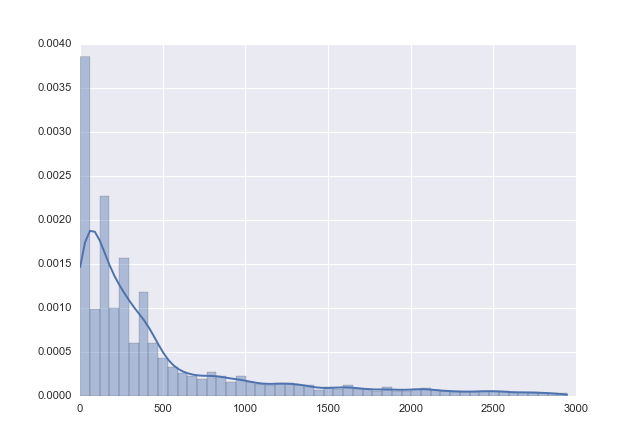

In [70]:
%matplotlib notebook
sns.distplot(ingredients)

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier 
# from sklearn import linear_model, decomposition
# from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV

In [209]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
# print X_train_minmax
# print X_test_minmax
print len(X_train_minmax)
print len(X_test_minmax)

3023
336


In [198]:
x = False
y = False
print x ^ y

False


In [78]:
pca = decomposition.PCA()
# print pca.fit_transform(X_train)
# print pca.transform(X_test)

y_train = np.array(y[3:])
y_test = np.array(y[1:3])

logistic = linear_model.LogisticRegression(C=0.1)
print logistic.fit(X_train_minmax, y_train)
print logistic.predict(X_test_minmax)
print y_test
logistic.score(X_test_minmax, y_test)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 1]
[0 1]


0.5

In [55]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
print X_digits
print type(X_digits[0])
print type(X_digits[0][0])
print np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
<type 'numpy.ndarray'>
<type 'numpy.float64'>
[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


[[  1.25946645e+00  -2.12748835e+01   9.46305462e+00 ...,   0.00000000e+00
    0.00000000e+00  -4.95712395e-14]
 [ -7.95761130e+00   2.07686990e+01  -4.43950604e+00 ...,   4.84244133e-16
    2.18931571e-15  -1.85607103e-16]
 [ -6.99192297e+00   9.95598641e+00  -2.95855808e+00 ...,   8.52127109e-17
    1.15329582e-15  -1.29615835e-16]
 ..., 
 [ -1.08012837e+01   6.96025223e+00  -5.59955453e+00 ...,  -2.70823161e-16
   -1.69584487e-16  -1.07867760e-16]
 [  4.87210009e+00  -1.24239536e+01   1.01708664e+01 ...,  -1.15080843e-16
    5.65789208e-17   1.37514308e-16]
 [  3.44389631e-01  -6.36554919e+00  -1.07737085e+01 ...,   2.90584272e-17
   -1.65436651e-16  -3.00745518e-16]]
[[  1.97205455e-19   1.73094651e-02   2.23428835e-01 ...,   8.94184677e-02
    3.65977111e-02   1.14684954e-02]
 [ -3.64228224e-18   1.01064569e-02   4.90849204e-02 ...,  -1.76697117e-01
   -1.94547053e-02   6.69693895e-03]
 [  1.87065065e-18  -1.83420720e-02  -1.26475543e-01 ...,  -2.32084163e-01
   -1.67026563e-01  -

<IPython.core.display.Javascript object>


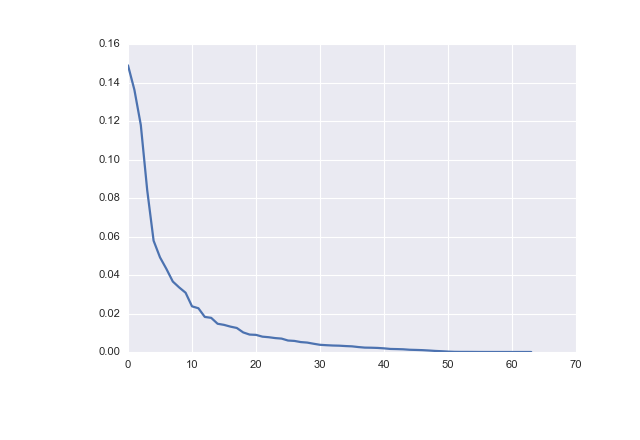

[[  1.25946645e+00  -2.12748835e+01   9.46305462e+00 ...,  -1.17664685e-15
   -4.02483056e-16   7.68214110e-16]
 [ -7.95761130e+00   2.07686990e+01  -4.43950604e+00 ...,   3.29937084e-15
    1.24627789e-15  -1.85607103e-16]
 [ -6.99192297e+00   9.95598641e+00  -2.95855808e+00 ...,  -3.05773851e-15
    8.28519364e-15  -1.29615835e-16]
 ..., 
 [ -1.08012837e+01   6.96025223e+00  -5.59955453e+00 ...,  -2.06729743e-15
   -1.23440137e-15  -1.07867760e-16]
 [  4.87210009e+00  -1.24239536e+01   1.01708664e+01 ...,   1.68000310e-16
    6.47095176e-15   1.37514308e-16]
 [  3.44389631e-01  -6.36554919e+00  -1.07737085e+01 ...,  -5.69116915e-16
    2.17959283e-16  -3.00745518e-16]]


In [81]:
pca = decomposition.PCA()
print pca.fit_transform(X_digits)
print pca.components_
%matplotlib notebook
# plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)

print pca.transform(X_digits)

In [73]:
logistic = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

mean: 0.87590, std: 0.00872, params: {'logistic__C': 0.0001, 'pca__n_components': 20}
Pipeline(steps=[('pca', PCA(copy=True, n_components=40, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [79]:
print estimator.grid_scores_[0]
print estimator.best_estimator_
print estimator.best_score_
print estimator.best_params_


mean: 0.87590, std: 0.00872, params: {'logistic__C': 0.0001, 'pca__n_components': 20}
Pipeline(steps=[('pca', PCA(copy=True, n_components=40, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
0.92264885921
{'logistic__C': 1.0, 'pca__n_components': 40}


In [253]:
from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'\w+')
tokenizer = RegexpTokenizer('[a-z]+')
review = "gysd efr"
raw_review = review.lower()
tokens = tokenizer.tokenize(raw_review)
print tokens
print len(tokens)

['gysd', 'efr']
2
